In [3]:
!kaggle datasets download -d caiojs/mnist-as-images-train-and-test

Dataset URL: https://www.kaggle.com/datasets/caiojs/mnist-as-images-train-and-test
License(s): DbCL-1.0
 93% 45.0M/48.6M [00:00<00:00, 241MB/s]
100% 48.6M/48.6M [00:00<00:00, 236MB/s]


In [ ]:
!unzip /content/mnist-as-images-train-and-test.zip

In [8]:
!pip install keras

In [37]:
import pandas as pd #base de manipulação de dados em formato de dataset
import os #biblioteca de interação com o sistema operacional
import numpy as np #manipular valores e operação numéricas (arrays)
import seaborn as sns #biblioteca de visualização de dados
import matplotlib.pyplot as plt #biblioteca de visualização de dados
from tqdm import tqdm

#Bibliotecas para trabalhar com imagens
import cv2 #open cv(visão computacional) processa imagens e vídeos
from PIL import Image #Pillow (image) manipular arquivos de imagem

#Bibliotecas para trabalhar com deep learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

## Entendimento dos Dados

In [90]:
imgPIL = Image.open('/content/test_images/0/10.jpg')

In [91]:
imgPIL

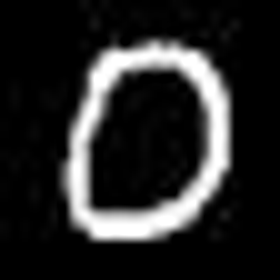

In [92]:
imgPIL = imgPIL.resize((280,280))
imgPIL

In [38]:
imgCV = cv2.imread('/content/test_images/3/1020.jpg')
imgCV = cv2.resize(imgCV, (28,28))
print(imgCV)

[[[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[3 3 3]
  [0 0 0]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


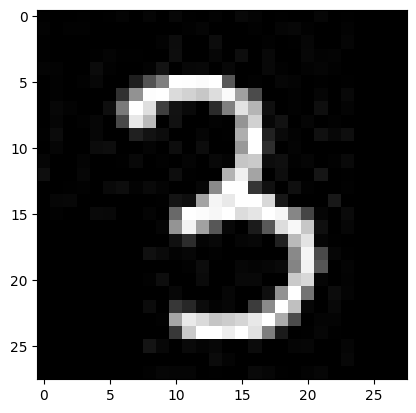

In [39]:
plt.imshow(imgCV)


In [40]:
imgCV.shape

(28, 28, 3)

In [41]:
imgCV = cv2.cvtColor(imgCV, cv2.COLOR_BGR2GRAY)
imgCV

array([[  1,   0,   0,   1,   0,   1,   4,   0,   5,   0,   7,   1,   0,
          3,   0,   8,   4,   0,   1,   0,   0,   6,   0,   1,   0,   0,
          0,   0],
       [  3,   0,   2,   2,   0,   0,   0,   0,   0,   0,   0,   2,   5,
          0,   0,   0,   2,   0,   5,   7,   2,   0,   0,   3,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   3,  12,   0,   0,
         12,   0,   0,   0,   2,   0,   1,   6,   0,   0,   5,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   1,   4,   1,   1,   0,   0,  13,   0,   0,
          6,   0,  13,   0,   8,   0,   0,   7,   3,   4,   0,   0,   0,
          0,   0],
       [  4,   3,   0,   0,  11,   2,   0,   0,   3,  19,   0,   7,   8,
          0,   7,   0,   0,   8,   2,   0,   3,   5,   2,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   2,   7,   0,   0,  30,  83, 127, 255, 254, 251,
        255,  88,   0,   2,   0,   6,   4,   0,   1,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   0,   0,  49, 146, 253, 255, 219, 210, 199,
        221, 251, 161,  75,   0,   0,   2,   0,   5,   0,   8,   0,   0,
          0,   0],
       [  0,   7,   3,   0,   0,  14, 122, 255, 223,  63,  18,   9,   0,
         43, 128, 227, 181,  15,   0,   2,   0,  14,   0,   4,   0,   0,
          0,   0],
       [  0,   5,   0,   2,   6,   0,  72, 232, 186,   0,  17,   0,   0,
          3,   1, 148, 209,   7,  18,   0,   5,   0,   2,   0,   0,   0,
          0,   0],
       [  1,  11,   0,   0,   6,   0,   0,  32,  18,  12,   0,   0,   5,
          0,   1, 174, 255,  33,   9,   3,   0,  16,   7,  14,   0,   0,
          0,   0],
       [  0,   5,   0,   0,  11,  13,   0,   0,   4,   0,  13,   0,  12,
          0,   0, 153, 255,  46,   0,   4,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  5,   0,   0,   4,   0,   0,   1,   8,   0,   2,   0,   4,   0,
          8,   4, 197, 202,  12,  15,   2,   5,   0,   2,   9,   0,   0,
          0,   0],
       [ 14,   0,   0,   6,   0,   0,   0,   0,   0,   0,  13,   1,   0,
          0, 179, 240, 164,   0,  13,   0,   0,  21,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   1,   2,   0,   9,  13,   3,   9,   4,   0,   0,   6,
        138, 255, 255,  53,  16,   0,  15,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   6,   7,   0,   0,   0,   0,   0,   0,   1,  20,  14, 163,
        245, 233, 255, 255, 216,  23,   0,   0,   0,  24,   0,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   9,   8,   0,   0,   4,   0, 105, 255, 252,
        247, 255, 220, 229, 255, 246, 134,  69,   5,   0,  10,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 148, 243, 162,
         87,   7,   0,  27,  89, 221, 248, 199,  15,   0,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  44,   4,
          8,   0,   5,   7,   0,  32, 186, 227,   5,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  16,  10,   3,   6,   0,
          2,   0,   0,   0,   0,   0, 137, 245,  74,   6,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  12,
          0,   0,   6,   4,   6,   9, 132, 242,  86,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,  13,   0,   0,  10,
          0,   0,   8,   8,   0,   0, 202, 216,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,   0,   0,
          0,   6,   0,   0,  15, 146, 255, 115,   0,  12,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  11,   0,  55,  39,  11,
          3,   6,   0,  60, 138, 255, 192,   6,   0,   8,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 166, 234, 218,
        197, 204, 213, 232, 255, 171,  75,   0,   4,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

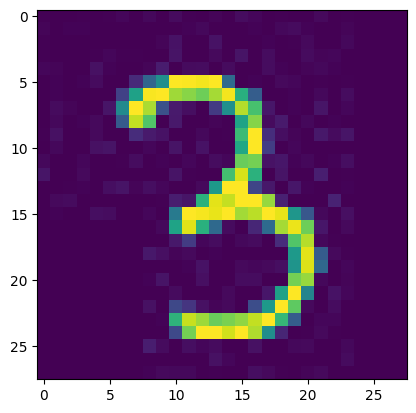

In [44]:
plt.imshow(imgCV)

In [53]:
imgPIL = np.array(imgPIL)
imgPIL.shape

(28, 28)

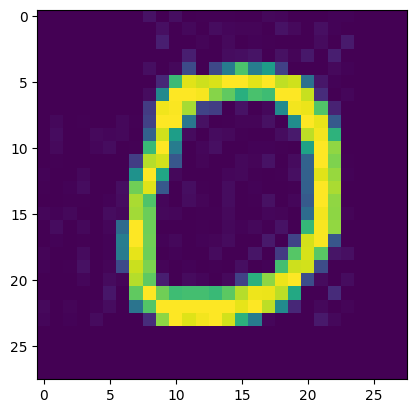

In [54]:
plt.imshow(imgPIL)

## Preparação de dados


In [55]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [75]:
def load_images_and_labels(folder):
    data = {'image' : [], 'label': []}

    for label in class_names:
      path = os.path.join(folder, label)

      for file in tqdm(os.listdir(path), desc=f'Loading {label}'):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
          data['image'].append(img)
          data['label'].append(label)

    return pd.DataFrame(data)


In [76]:
df_train = load_images_and_labels('/content/train_images')


Loading 9: 100%|██████████| 5949/5949 [00:01<00:00, 4553.98it/s]


In [77]:
df_train.head()

,image,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0,...",0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 0, 7, 5, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 1, 0, 0, 0, 15...",0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 1, 9, 8,...",0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0,...",0


In [95]:
X = df_train['image']
y = df_train['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
print(X_train.shape, y_train.shape)

(48000,) (48000,)


In [97]:
print(X_val.shape, y_val.shape)

(12000,) (12000,)


In [98]:
X_train = np.array([np.array(image) for image in X_train])
X_val = np.array([np.array(image) for image in X_val])

In [102]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [103]:
print(X_train.shape, y_train.shape)

(48000, 28, 28) (48000, 10)


In [104]:
print(X_val.shape, y_val.shape)

(12000, 28, 28) (12000, 10)


## Modelagem


In [111]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units = 10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 317,066 (1.21 MB)

 Trainable params: 317,066 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [118]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 58ms/step - accuracy: 0.9782 - loss: 0.0764 - val_accuracy: 0.9844 - val_loss: 0.0635
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 131s 50ms/step - accuracy: 0.9798 - loss: 0.0751 - val_accuracy: 0.9847 - val_loss: 0.0692
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 49ms/step - accuracy: 0.9801 - loss: 0.0726 - val_accuracy: 0.9852 - val_loss: 0.0574


In [119]:
def plotLearningCurve(history, epochs):
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.show()

  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.show()

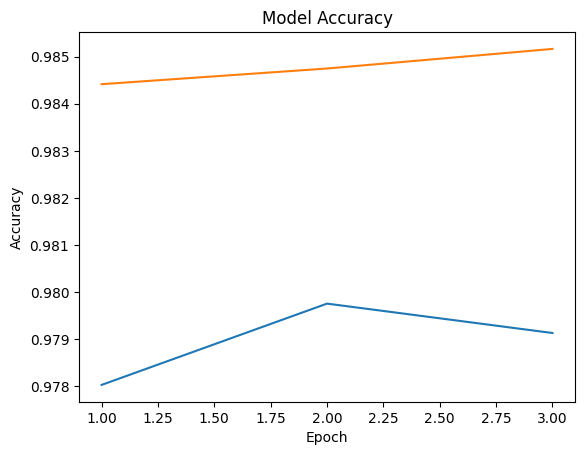

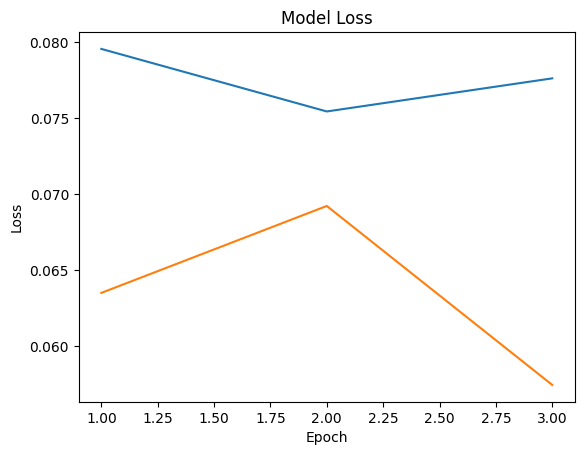

In [120]:
plotLearningCurve(history, 3)

In [123]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step


In [124]:
matriz = confusion_matrix(y_true, y_pred_classes)
matriz

array([[1172,    0,    2,    0,    0,    0,    5,    0,    0,    2],
       [   3, 1334,    3,    0,    1,    0,    0,    5,    3,    1],
       [   1,    2, 1145,    7,    0,    0,    0,    4,    3,    0],
       [   0,    0,    1, 1197,    0,    3,    0,    0,    1,    1],
       [   2,    2,    0,    1, 1106,    0,    1,    2,    0,   10],
       [   2,    1,    0,   18,    0, 1083,    5,    3,    3,    1],
       [   1,    0,    1,    1,    0,    4, 1212,    0,    2,    0],
       [   3,    4,    5,    1,    2,    0,    0, 1233,    1,    0],
       [   4,    4,    1,    5,    0,    3,    3,    2, 1184,    4],
       [   9,    0,    0,    4,    3,    1,    0,    9,    2, 1156]])